# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Importing data from files and converting to dataframes

sat_2017 = pd.read_csv("../data/sat_2017.csv")
act_2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [5]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [6]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


Answer:

#### 4a. Does the data look complete? 

Answer: Yes, as all the counts match up for all columns for both datasets

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

- SAT2017 dataset:
    - For the SAT, the minimum possible score is 200 and the maximum possible score is 800.
    - However, the descriptive statistics show a minimum score of 52.0, which is below the minimum threshold.
    - A comparison with the original data reveals that Maryland's score for Math should be 524 instead of 52
  
    
- ACT2017 dataset:
    - For the, ACT min possible score is 1 and the maximum possible score is 36.
    - It is highly unlikely to get a score below 11, however, the descriptive statistics show a minimum score of 2.30, which is suspicious.
    - A comparison with the original data reveals that Maryland's Science score should be 23.1 instead of 2.3

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
# Correcting Maryland SAT math score

sat_2017.at[20, "Math"] = 524

print (sat_2017.iloc[20])

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object


In [8]:
# Correcting Maryland ACT Science score

act_2017.at[21, "Science"] = 23.2

print (act_2017.iloc[21])

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science              23.2
Composite            23.6
Name: 21, dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [9]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [10]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

- SAT2017 dataset
    - The data for SAT2017 "Participation" column was imported as objects (strings). The data should be converted to floats for easier manipulation.


- ACT2017 dataset
    - The data for the ACT2017 "Composite" column was imported as strings. The data should be converted to floats for easier manipulation.
    
    - The data for the ACT2017 "Participation" column was stored as objects (strings). The data should be converted to floats for easier manipulation.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
# Percent to float function

def part_rate_cleaner (num):
    
    # Remove percentage sign
    try:
        num = float(num.strip("%"))
    except:
        pass
    
    if num > 1:
        result = num/100
    else:
        result = num
        
    return round(result,2)

In [12]:
# Applying function to both datasets

sat_2017["Participation"] = sat_2017["Participation"].apply(part_rate_cleaner, 1)
act_2017["Participation"] = act_2017["Participation"].apply(part_rate_cleaner, 1)

In [13]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [14]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [15]:
# Trying to convert "Composite" to floats from strings results in a ValueError. 

# Checking composite for non-numerical entry
for row in act_2017.iterrows():
    try:
        float(row[1]["Composite"])
    except:
        print (row)

(51, State            Wyoming
Participation          1
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite          20.2x
Name: 51, dtype: object)


In [16]:
# Correcting composite score for Wyoming (extra "x" at end of score)
act_2017.at[51, "Composite"] = 20.2

# Converting Composite to float
act_2017["Composite"] = act_2017["Composite"].astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [17]:
sat_2017["Participation"].dtypes

dtype('float64')

In [18]:
act_2017["Composite"].dtypes

dtype('float64')

- Display the data types again to confirm they are correct.

In [19]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [20]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
# Function for batch renaming of headers

def rename_header (dataset, exam_type, year):
    
    # Function for editing individual titles
    
    def edit_title (title,exam_type):

        title = (title.replace(" ","_")).lower()
        exam_type = exam_type.upper()

        return f"{year}_{exam_type}_{title}"

    dataset.rename(columns = lambda i:edit_title(i,exam_type), inplace = True)

In [22]:
rename_header(sat_2017, "SAT", 2017)
rename_header(act_2017, "ACT", 2017)

In [23]:
sat_2017.columns

Index(['2017_SAT_state', '2017_SAT_participation',
       '2017_SAT_evidence-based_reading_and_writing', '2017_SAT_math',
       '2017_SAT_total'],
      dtype='object')

In [24]:
act_2017.columns

Index(['2017_ACT_state', '2017_ACT_participation', '2017_ACT_english',
       '2017_ACT_math', '2017_ACT_reading', '2017_ACT_science',
       '2017_ACT_composite'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|2017_SAT_state|string|sat_2017|participating state for SAT 2017| 
|2017_SAT_participation|float|sat_2017|participation percentage for SAT 2017| 
|2017_SAT_evidence-based_reading_and_writing|float|sat_2017|evidence-based reading and writing score for SAT 2017 | 
|2017_SAT_math|float|sat_2017|Math score for SAT 2017| 
|2017_SAT_total|float|sat_2017|Total score for SAT 2017| 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|2017_ACT_state|string|act_2017|participating state for ACT 2017| 
|2017_ACT_participation |float|act_2017|participation percentage for ACT 2017| 
|2017_ACT_english|float|act_2017|English score for ACT 2017| 
|2017_ACT_math|float|act_2017|Math score for ACT 2017| 
|2017_ACT_reading|float|act_2017|Reading score for ACT 2017| 
|2017_ACT_science|float|act_2017|Science score for ACT 2017| 
|2017_ACT_composite |float|act_2017|Composite score for ACT 2017| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [25]:
# Checking which dataframe has an additional row

print (sat_2017.shape[0])
print (act_2017.shape[0])

51
52


In [26]:
# Identifying different row

for ind, val in act_2017["2017_ACT_state"].items():
    if val not in sat_2017["2017_SAT_state"].values:
        print (ind, val)

0 National


In [27]:
# Removing row

act_2017.drop([0,0], inplace = True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [28]:
# Merging both dataframes with "State" as key

combined_2017 = sat_2017.merge(act_2017, left_on = "2017_SAT_state", right_on = "2017_ACT_state")

# Removing extra 2017_act_state column

combined_2017.drop(columns = ["2017_ACT_state"], inplace=True)

# Renaming first column to "2017_state"

combined_2017.rename(columns = {"2017_SAT_state":"2017_state"},inplace = True)

In [29]:
combined_2017.head()

,2017_state,2017_SAT_participation,2017_SAT_evidence-based_reading_and_writing,2017_SAT_math,2017_SAT_total,2017_ACT_participation,2017_ACT_english,2017_ACT_math,2017_ACT_reading,2017_ACT_science,2017_ACT_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [30]:
#saving to CSV file

combined_2017.to_csv(r'../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [31]:
# Importing data from files and converting to dataframes

sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [32]:
# the part_rate_cleaner function still works for the SAT dataset. Applying function to dataset.

sat_2018["Participation"] = sat_2018["Participation"].apply(part_rate_cleaner, 1)

In [33]:
# Renaming act_2018 to match all other datasets

act_2018.rename(columns = lambda i:i[8:(len(i)-6)], inplace = True)
act_2018.rename(columns = {act_2018.columns[1]:"Participation"},inplace = True)
act_2018.rename(columns = {act_2018.columns[0]:"State"},inplace = True)

# Converting participation scores to floats for the ACT dataset

act_2018["Participation"] = act_2018["Participation"].apply(part_rate_cleaner, 1)

In [34]:
# Applying rename_header function to datasets

rename_header(sat_2018, "SAT", 2018)
rename_header(act_2018, "ACT", 2018)

#### Merging datasets

In [35]:
# Merging sat_2018 and act_2018 dataframes with "State" as key
combined_2018 = sat_2018.merge(act_2018, left_on = "2018_SAT_state", right_on = "2018_ACT_state")

# Removing 2018_act_state column

combined_2018.drop(columns = ["2018_ACT_state"], inplace=True)

# Merging combined_2017 and combined_2018 dataframes with "State" as key

final = combined_2017.merge(combined_2018, left_on = "2017_state", right_on = "2018_SAT_state")

# Removing 2018_sat_state column

final.drop(columns = ["2018_SAT_state"], inplace = True)

# Renaming 2017_state column to state

final.rename(columns = {"2017_state":"state"},inplace = True)

final.head()

,state,2017_SAT_participation,2017_SAT_evidence-based_reading_and_writing,2017_SAT_math,2017_SAT_total,2017_ACT_participation,2017_ACT_english,2017_ACT_math,2017_ACT_reading,2017_ACT_science,...,2018_SAT_participation,2018_SAT_evidence-based_reading_and_writing,2018_SAT_math,2018_SAT_total,2018_ACT_participation,2018_ACT_composite,2018_ACT_english,2018_ACT_math,2018_ACT_reading,2018_ACT_science
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [36]:
final.describe()

,2017_SAT_participation,2017_SAT_evidence-based_reading_and_writing,2017_SAT_math,2017_SAT_total,2017_ACT_participation,2017_ACT_english,2017_ACT_math,2017_ACT_reading,2017_ACT_science,2017_ACT_composite,2018_SAT_participation,2018_SAT_evidence-based_reading_and_writing,2018_SAT_math,2018_SAT_total,2018_ACT_participation,2018_ACT_composite,2018_ACT_english,2018_ACT_math,2018_ACT_reading,2018_ACT_science
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [37]:
def st_dev(num_list):
    
    mean = (sum(num_list))/len(num_list)
    
    total = sum([(i-mean)**2 for i in num_list])
    
    result = (total / len(num_list))**0.5
    
    return result

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [38]:
sd = {i:st_dev(list(final[i])) for i in final.columns[1:]}

sd

{'2017_SAT_participation': 0.3492907076664507,
 '2017_SAT_evidence-based_reading_and_writing': 45.21697020437866,
 '2017_SAT_math': 46.65713364485503,
 '2017_SAT_total': 91.58351056778743,
 '2017_ACT_participation': 0.3182417575123181,
 '2017_ACT_english': 2.3304876369363363,
 '2017_ACT_math': 1.9624620273436781,
 '2017_ACT_reading': 2.0469029314842646,
 '2017_ACT_science': 1.7222161451443676,
 '2017_ACT_composite': 2.000786081581989,
 '2018_SAT_participation': 0.3694661922353942,
 '2018_SAT_evidence-based_reading_and_writing': 47.03460978357609,
 '2018_SAT_math': 47.30194550378352,
 '2018_SAT_total': 93.22742384464433,
 '2018_ACT_participation': 0.33745194881997503,
 '2018_ACT_composite': 2.0855261815801147,
 '2018_ACT_english': 2.4222536143202795,
 '2018_ACT_math': 2.015707255555717,
 '2018_ACT_reading': 2.145891884510421,
 '2018_ACT_science': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:
- The manual method differs from the values generated by pandas' describe function, but are the same as the values generated by numpy's std function

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Examining SAT participation rates

In [39]:
# Sorting by lowest 2017 SAT participation rates

final.sort_values("2017_SAT_participation")[["state","2017_SAT_participation","2018_SAT_participation"]].head()

,state,2017_SAT_participation,2018_SAT_participation
34,North Dakota,0.02,0.02
24,Mississippi,0.02,0.03
15,Iowa,0.02,0.03
25,Missouri,0.03,0.04
44,Utah,0.03,0.04


In [40]:
# Sorting by highest 2017 SAT participation rate

final.sort_values("2017_SAT_participation", ascending = False)[["state","2017_SAT_participation","2018_SAT_participation"]].head()

,state,2017_SAT_participation,2018_SAT_participation
8,District of Columbia,1.00,0.92
22,Michigan,1.00,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
29,New Hampshire,0.96,0.96


In [41]:
# Sorting by lowest 2018 SAT participation rates

final.sort_values("2018_SAT_participation")[["state","2017_SAT_participation","2018_SAT_participation"]].head()

,state,2017_SAT_participation,2018_SAT_participation
34,North Dakota,0.02,0.02
50,Wyoming,0.03,0.03
41,South Dakota,0.03,0.03
27,Nebraska,0.03,0.03
49,Wisconsin,0.03,0.03


In [42]:
# Sorting by highest 2018 SAT participation rates

final.sort_values("2018_SAT_participation", ascending = False)[["state","2017_SAT_participation","2018_SAT_participation"]].head()

,state,2017_SAT_participation,2018_SAT_participation
5,Colorado,0.11,1.0
6,Connecticut,1.00,1.0
7,Delaware,1.00,1.0
22,Michigan,1.00,1.0
12,Idaho,0.93,1.0


### Examining ACT participation rates

In [43]:
# Sorting by lowest 2017 ACT participation rates

final.sort_values("2017_ACT_participation")[["state","2017_ACT_participation","2018_ACT_participation"]].head()

,state,2017_ACT_participation,2018_ACT_participation
19,Maine,0.08,0.07
29,New Hampshire,0.18,0.16
7,Delaware,0.18,0.17
39,Rhode Island,0.21,0.15
38,Pennsylvania,0.23,0.20


In [44]:
# Sorting by highest 2017 ACT participation rates

final.sort_values("2017_ACT_participation", ascending = False)[["state","2017_ACT_participation","2018_ACT_participation"]].head()

,state,2017_ACT_participation,2018_ACT_participation
0,Alabama,1.0,1.0
17,Kentucky,1.0,1.0
49,Wisconsin,1.0,1.0
44,Utah,1.0,1.0
42,Tennessee,1.0,1.0


In [45]:
# Sorting by lowest 2018 ACT participation rates

final.sort_values("2018_ACT_participation")[["state","2017_ACT_participation","2018_ACT_participation"]].head()

,state,2017_ACT_participation,2018_ACT_participation
19,Maine,0.08,0.07
39,Rhode Island,0.21,0.15
29,New Hampshire,0.18,0.16
7,Delaware,0.18,0.17
38,Pennsylvania,0.23,0.20


In [46]:
# Sorting by highest 2018 ACT participation rates

final.sort_values("2018_ACT_participation", ascending = False)[["state","2017_ACT_participation","2018_ACT_participation"]].head()

,state,2017_ACT_participation,2018_ACT_participation
0,Alabama,1.0,1.0
17,Kentucky,1.0,1.0
49,Wisconsin,1.0,1.0
44,Utah,1.0,1.0
42,Tennessee,1.0,1.0


### Examining difference in participation rates between 2017 and 2018

In [47]:
# Creating dataframe containing difference in participation rates for SAT and ACT
final["SAT_part_change"] = final["2018_SAT_participation"]-final["2017_SAT_participation"]
final["ACT_part_change"] = final["2018_ACT_participation"]-final["2017_ACT_participation"]

# Filtering dataframes for participation rate changes of more than 0.5

margin = 0.5

SAT_sig_change = final[(final["SAT_part_change"] >= margin) | (final["SAT_part_change"] <= -margin)]
ACT_sig_change = final[(final["ACT_part_change"] >= margin) | (final["ACT_part_change"] <= -margin)]

In [48]:
# Displaying significant SAT participation rate change between 2017 and 2018

SAT_sig_change[["state","SAT_part_change"]]

,state,SAT_part_change
5,Colorado,0.89
13,Illinois,0.90


In [49]:
# Displaying significant ACT participation rate change between 2017 and 2018

ACT_sig_change[["state","ACT_part_change"]]

,state,ACT_part_change
5,Colorado,-0.7
13,Illinois,-0.5


### Examining high and low participation rates for both years

In [50]:
# Filtering dataframes for participation rate of more than 0.5 for both years

margin = 0.5

high_part_2017 = final[(final["2017_SAT_participation"] > margin) & (final["2017_ACT_participation"] > margin)]
high_part_2018 = final[(final["2018_SAT_participation"] > margin) & (final["2018_ACT_participation"] > margin)]

# Filtering dataframes for participation rate of less than 0.5 for both years

low_part_2017 = final[(final["2017_SAT_participation"] < margin) & (final["2017_ACT_participation"] < margin)]
low_part_2018 = final[(final["2018_SAT_participation"] < margin) & (final["2018_ACT_participation"] < margin)]

In [51]:
# Displaying high SAT and ACT participation rates for 2017

high_part_2017[["state","2017_SAT_participation","2018_SAT_participation"]]

,state,2017_SAT_participation,2018_SAT_participation
9,Florida,0.83,0.56
10,Georgia,0.61,0.70
11,Hawaii,0.55,0.56


In [52]:
# Displaying high SAT and ACT participation rates for 2018

high_part_2018[["state","2017_SAT_participation","2018_SAT_participation"]]

,state,2017_SAT_participation,2018_SAT_participation
9,Florida,0.83,0.56
10,Georgia,0.61,0.70
11,Hawaii,0.55,0.56
33,North Carolina,0.49,0.52
40,South Carolina,0.50,0.55


In [53]:
# Displaying low SAT and ACT participation rates for 2017

low_part_2017[["state","2017_SAT_participation","2018_SAT_participation"]]

,state,2017_SAT_participation,2018_SAT_participation
37,Oregon,0.43,0.48


In [54]:
# Displaying low SAT and ACT participation rates for 2018

low_part_2018[["state","2017_SAT_participation","2018_SAT_participation"]]

,state,2017_SAT_participation,2018_SAT_participation
1,Alaska,0.38,0.43
37,Oregon,0.43,0.48


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [55]:
# Function to generate a heatmap with the upper triangle masked

def halfmap(dataset,header, colours = "coolwarm"):
    plt.figure(figsize=(16,10));
    plt.title(label = header, loc = "center", fontdict = {"fontsize":25})
    mask = np.triu(dataset.corr());
    sns.heatmap(data = dataset.corr(), cmap = colours, annot = True, mask = mask, );

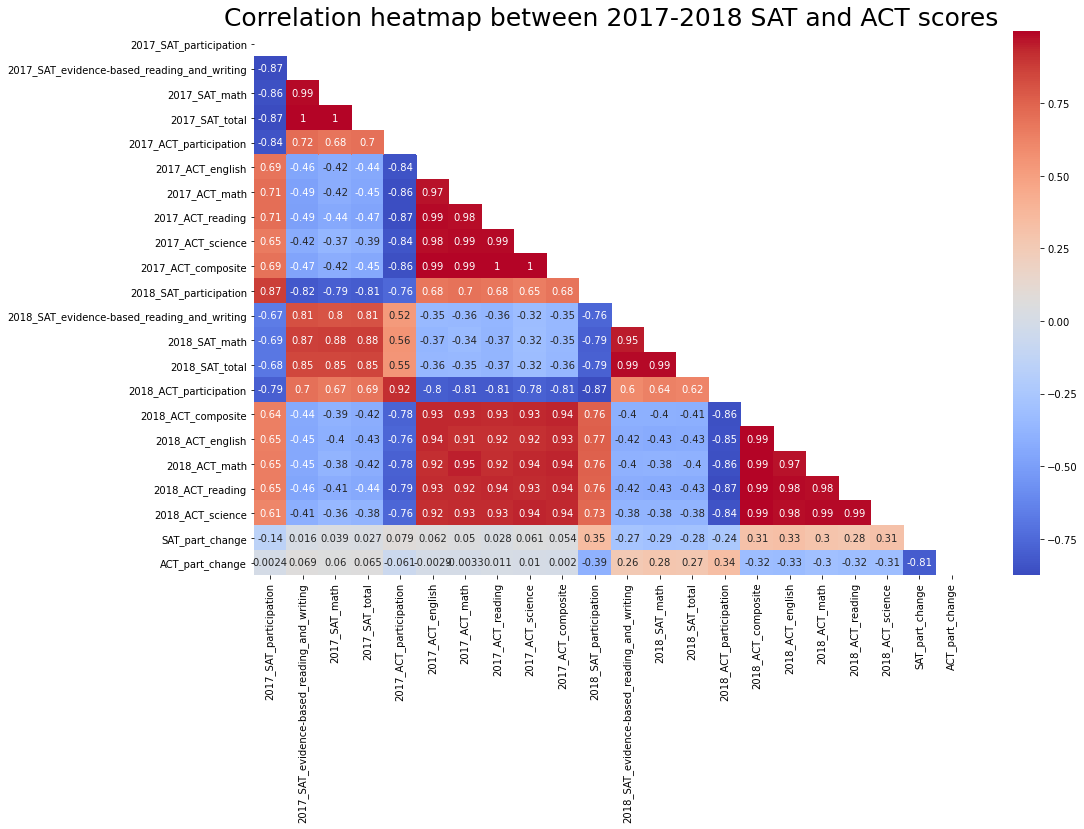

In [56]:
halfmap(final, "Correlation heatmap between 2017-2018 SAT and ACT scores")

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [57]:
def subplot_histograms(dataframe, list_of_columns, xlabels):
    
    list_of_titles = [i.replace("_"," ") for i in list_of_columns]
    
    list_of_xlabels = [xlabels for i in list_of_columns]
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,5), sharex = True, sharey= True) # You'll want to specify your figsize
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].hist(dataframe[column], bins = 10) # feel free to add more settings
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

### Participation rates for SAT and ACT

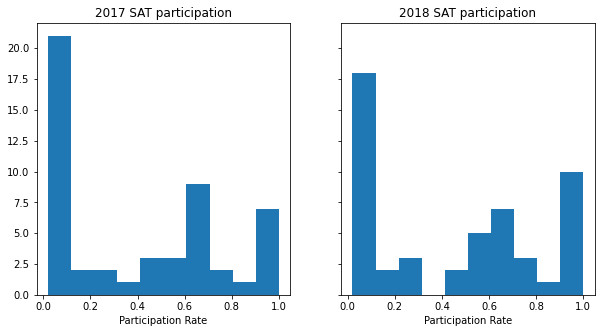

In [58]:
# Comparison of SAT Participation rates for 2017-2018

SATpart = ["2017_SAT_participation", "2018_SAT_participation"]
subplot_histograms(final, SATpart, "Participation Rate")


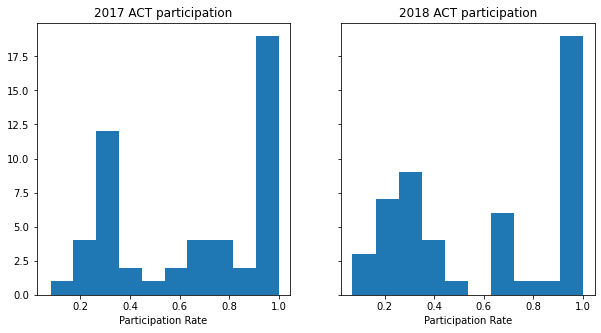

In [59]:
# Comparison of ACT Participation rates for 2017-2018

ACTpart = ["2017_ACT_participation", "2018_ACT_participation"]
subplot_histograms(final, ACTpart, "Participation Rate")

### Math scores for SAT and ACT

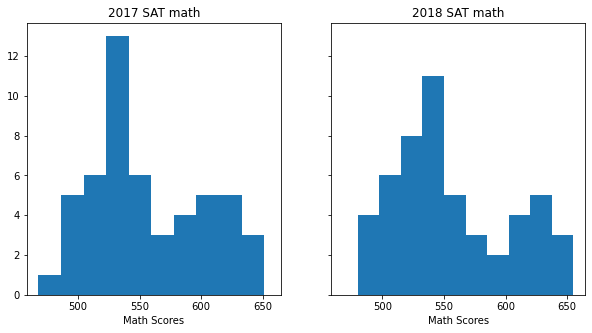

In [60]:
# Comparison of SAT Math scores for 2017-2018

SATmath = ["2017_SAT_math", "2018_SAT_math"]
subplot_histograms(final, SATmath, "Math Scores")

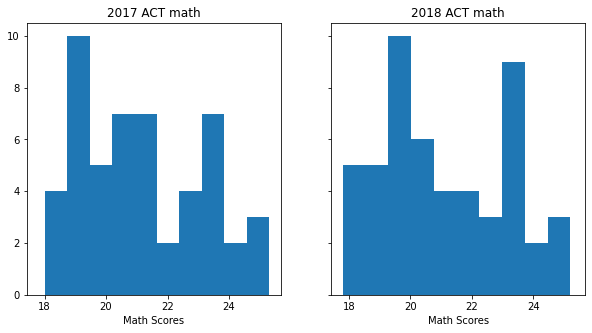

In [61]:
# Comparison of ACT Math scores for 2017-2018

ACTmath = ["2017_ACT_math", "2018_ACT_math"]
subplot_histograms(final, ACTmath, "Math Scores")

### Reading/Writing scores for SAT and ACT

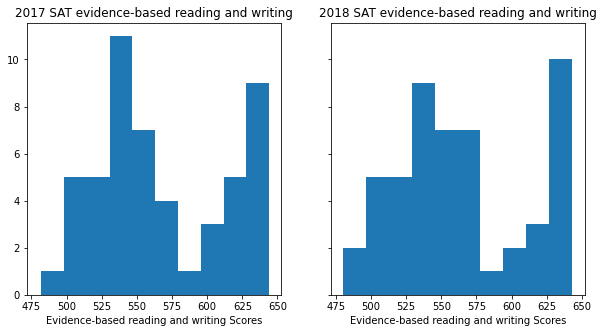

In [62]:
# Comparison of evidence-based_reading_and_writing scores for 2017 to 2018

SATrnw = ["2017_SAT_evidence-based_reading_and_writing", "2018_SAT_evidence-based_reading_and_writing"]
subplot_histograms(final, SATrnw, "Evidence-based reading and writing Scores")

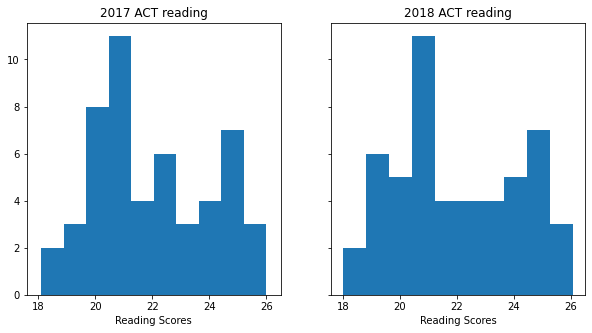

In [63]:
# Comparison of evidence-based_reading_and_writing scores for 2017 to 2018

ACTr = ["2017_ACT_reading", "2018_ACT_reading"]
subplot_histograms(final, ACTr, "Reading Scores")

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [64]:
# Seaborn's regplot function creats a regression line in addition to a scatter plot, 
# allowing for more detailed analyses

# Custom function to create regplot

def regplot(dataframe, list_of_columns):     

    # Checking for only 2 items in list_of_columns
    
    if not len(list_of_columns) == 2:
        return "Error!"
    else:
    
        # Removing underscores for label text and creating title

        label_text = [i.replace("_"," ") for i in list_of_columns]
        title = label_text[0] + " vs. " + label_text[1]

        # Creating regplot
        
        x_list = dataframe[list_of_columns[0]]
        y_list = dataframe[list_of_columns[1]]
        
        ax = sns.regplot(x=x_list,y=y_list)
        ax.set_xlabel(label_text[0])
        ax.set_ylabel(label_text[1])
        ax.set_title(title, fontsize = 16)
        
        plt.show()

        # Calculating and showing correlation value
        
        corr = [round(i,3) for i in pearsonr(x_list, y_list)]
        
        print (f"r = {corr[0]}, p = {corr[1]}")

    

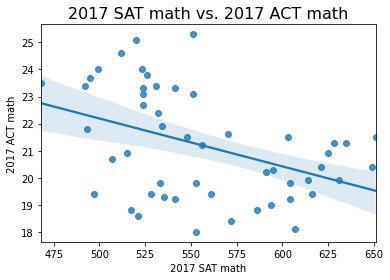

r = -0.42, p = 0.002


In [65]:
regplot(final,["2017_SAT_math","2017_ACT_math"]);

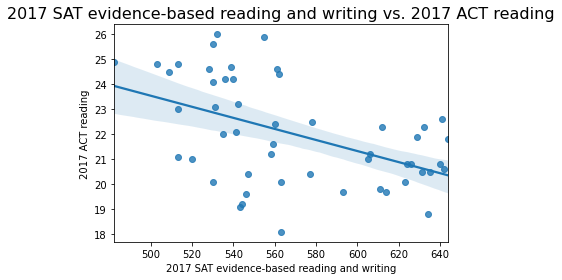

r = -0.488, p = 0.0


In [66]:
regplot(final,['2017_SAT_evidence-based_reading_and_writing','2017_ACT_reading'])

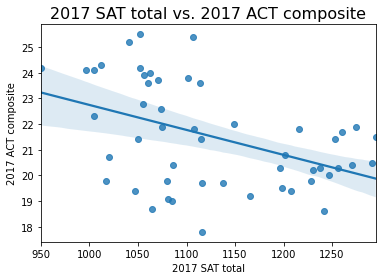

r = -0.445, p = 0.001


In [67]:
regplot(final,['2017_SAT_total','2017_ACT_composite'])

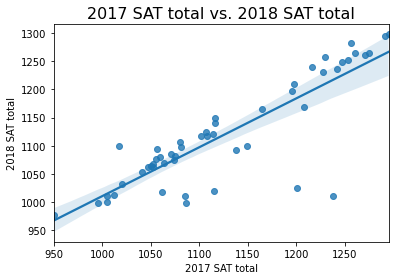

r = 0.853, p = 0.0


In [68]:
regplot(final,['2017_SAT_total','2018_SAT_total'])

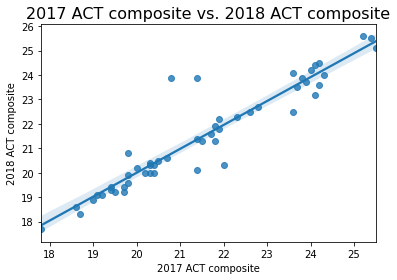

r = 0.939, p = 0.0


In [69]:
regplot(final,['2017_ACT_composite','2018_ACT_composite'])

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [70]:
def boxer(dataset, list_of_columns, title, orient = "v"):
    
    # Removing underscores for label text and creating title
    
    label_text = [i.replace("_"," ") for i in list_of_columns]
    
    plt.figure(figsize=(14,8))
    
    ax = sns.boxplot(data = dataset[list_of_columns], orient = orient)
    ax.set_title(title, fontsize = 16)
    
    if orient == "v":
        ax.set_xticklabels(label_text, fontsize = 14)
    else: 
        ax.set_yticklabels(label_text, fontsize = 10)

### Boxplots for SAT scores

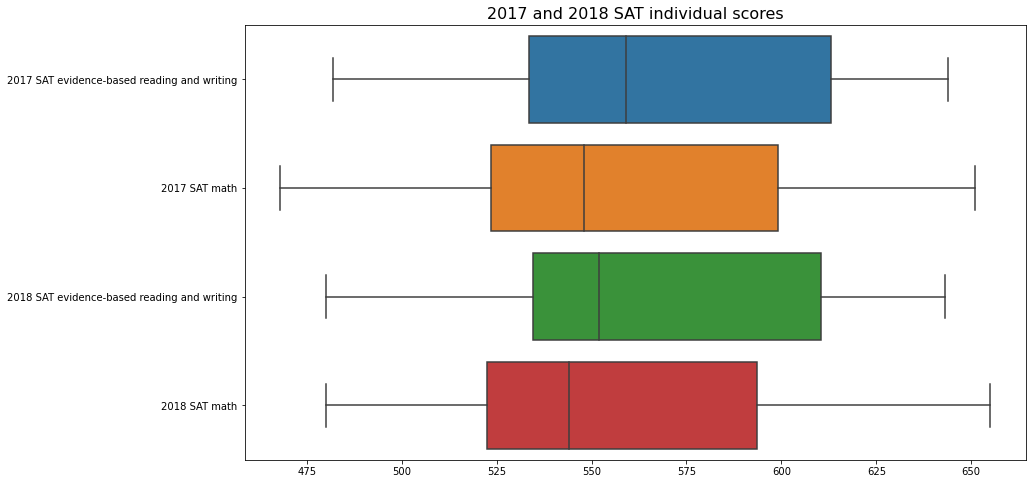

In [71]:
boxer(final,['2017_SAT_evidence-based_reading_and_writing', '2017_SAT_math','2018_SAT_evidence-based_reading_and_writing', '2018_SAT_math'], "2017 and 2018 SAT individual scores", "h")

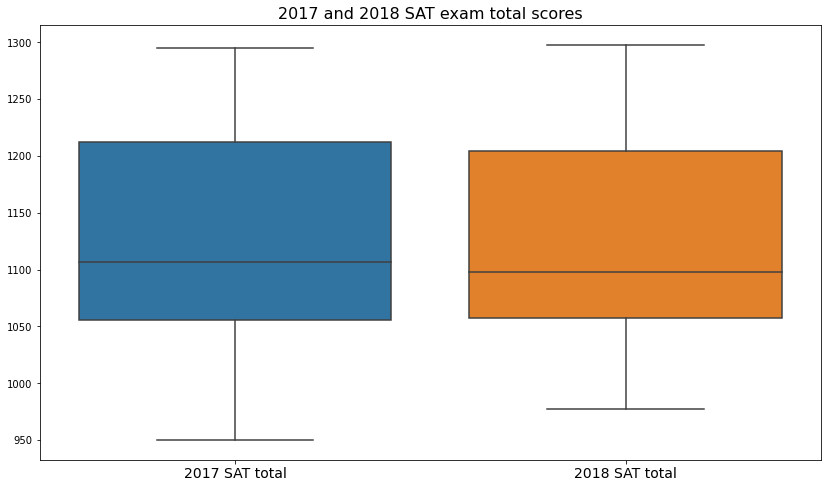

In [72]:
boxer(final,['2017_SAT_total','2018_SAT_total'], "2017 and 2018 SAT exam total scores")

In [73]:
final.columns

Index(['state', '2017_SAT_participation',
       '2017_SAT_evidence-based_reading_and_writing', '2017_SAT_math',
       '2017_SAT_total', '2017_ACT_participation', '2017_ACT_english',
       '2017_ACT_math', '2017_ACT_reading', '2017_ACT_science',
       '2017_ACT_composite', '2018_SAT_participation',
       '2018_SAT_evidence-based_reading_and_writing', '2018_SAT_math',
       '2018_SAT_total', '2018_ACT_participation', '2018_ACT_composite',
       '2018_ACT_english', '2018_ACT_math', '2018_ACT_reading',
       '2018_ACT_science', 'SAT_part_change', 'ACT_part_change'],
      dtype='object')

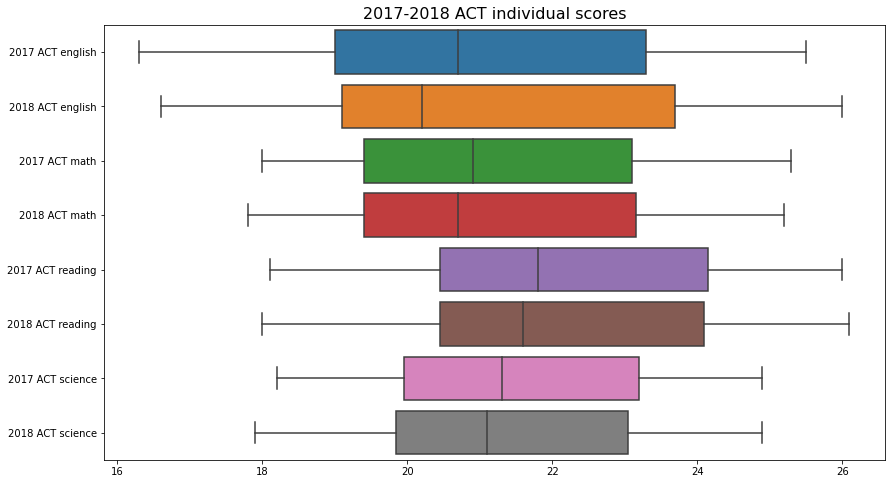

In [74]:
boxer(final, ['2017_ACT_english','2018_ACT_english','2017_ACT_math','2018_ACT_math', '2017_ACT_reading', '2018_ACT_reading', '2017_ACT_science','2018_ACT_science'], "2017-2018 ACT individual scores","h" )

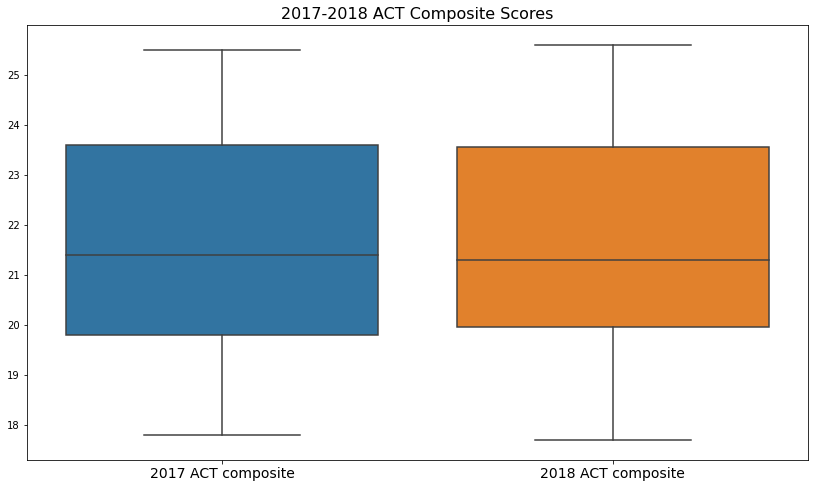

In [75]:
boxer(final, ['2017_ACT_composite', '2018_ACT_composite'], "2017-2018 ACT Composite Scores")

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [76]:
final.describe()

,2017_SAT_participation,2017_SAT_evidence-based_reading_and_writing,2017_SAT_math,2017_SAT_total,2017_ACT_participation,2017_ACT_english,2017_ACT_math,2017_ACT_reading,2017_ACT_science,2017_ACT_composite,...,2018_SAT_math,2018_SAT_total,2018_ACT_participation,2018_ACT_composite,2018_ACT_english,2018_ACT_math,2018_ACT_reading,2018_ACT_science,SAT_part_change,ACT_part_change
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,...,556.235294,1120.019608,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098,0.059412,-0.036078
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,...,47.772623,94.155083,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114,0.182717,0.134478
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,...,480.000000,977.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000,-0.270000,-0.700000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,...,522.500000,1057.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000,0.000000,-0.040000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,...,544.000000,1098.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000,0.010000,-0.010000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,...,593.500000,1204.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000,0.050000,0.000000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,...,655.000000,1298.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000,0.900000,0.250000


In [77]:
final.skew(axis = 0)

2017_SAT_participation                         0.346450
2017_SAT_evidence-based_reading_and_writing    0.272693
2017_SAT_math                                  0.365040
2017_SAT_total                                 0.310903
2017_ACT_participation                        -0.197989
2017_ACT_english                               0.352660
2017_ACT_math                                  0.332683
2017_ACT_reading                               0.269366
2017_ACT_science                               0.218823
2017_ACT_composite                             0.319810
2018_SAT_participation                         0.136228
2018_SAT_evidence-based_reading_and_writing    0.282300
2018_SAT_math                                  0.530407
2018_SAT_total                                 0.466432
2018_ACT_participation                        -0.021916
2018_ACT_composite                             0.281962
2018_ACT_english                               0.371507
2018_ACT_math                                  0

In [80]:
final.kurt(axis = 0)

2017_SAT_participation                         -1.380695
2017_SAT_evidence-based_reading_and_writing    -1.220371
2017_SAT_math                                  -0.925843
2017_SAT_total                                 -1.105461
2017_ACT_participation                         -1.631970
2017_ACT_english                               -0.879307
2017_ACT_math                                  -0.979210
2017_ACT_reading                               -0.982094
2017_ACT_science                               -0.956033
2017_ACT_composite                             -0.983524
2018_SAT_participation                         -1.569003
2018_SAT_evidence-based_reading_and_writing    -1.055118
2018_SAT_math                                  -0.756126
2018_SAT_total                                 -1.022725
2018_ACT_participation                         -1.738681
2018_ACT_composite                             -1.080666
2018_ACT_english                               -1.071710
2018_ACT_math                  

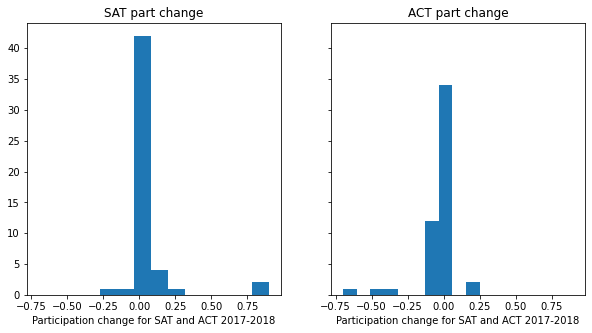

In [79]:
subplot_histograms(final, ["SAT_part_change", "ACT_part_change"], "Participation change for SAT and ACT 2017-2018")


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?